<a href="https://colab.research.google.com/github/RayKwon2040/Telecom-Customer-Churn/blob/main/Telcom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

This dataset contains customer churn information from the telecommunications industry, consisting of 21 variables and 7,043 customer records. It includes details on the services each customer has subscribed to, along with their account and demographic information.

The primary objective of this project is to develop an accurate predictive model for customer churn. Retaining existing customers is critical in the telecommunications industry, as acquiring new customers is more costly than keeping current ones. By building a predictive model, companies can enhance their services and marketing strategies to improve customer retention.

## **Table of Contents**



1.   Exploratory Data Analysis and Data Cleaning
2.   Feature Importance
3.   Feature Engineering
4.   Model Development

              *   Baseline
              *   Logistic Regression
              *   K-nearest neighbors
              *   Random Foreset
              *   Support Vector Machine
              *   XGBoost

5.   Conculsion


## **Exploratory Data Analysis and Data Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Import
import pandas as pd
import numpy as np

df_telco = pd.read_csv('/content/drive/MyDrive/data/Telco-Customer-Churn.csv')
df_telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df_telco.info()

#TotalCharge is numeric value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

In [ ]:
df_telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#Check Null

df_telco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Remove null

df_telco.dropna(inplace=True)

In [ ]:
#Check Duplication

sum(df_telco.duplicated())

0

In [ ]:
df_telco.drop(columns = 'customerID', inplace=True)

In [ ]:
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace(' (automatic)', '', regex=False )

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math


<Axes: title={'center': 'Churn'}, xlabel='Churn'>

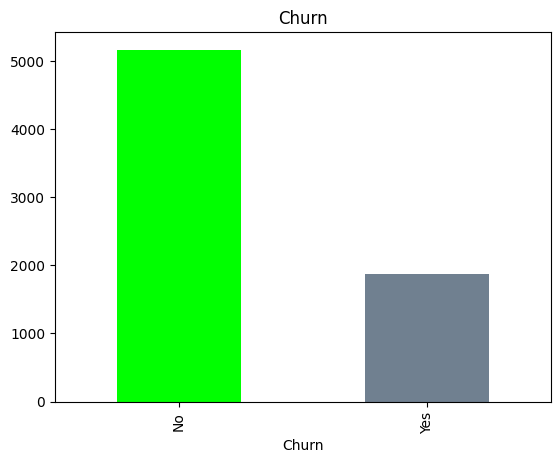

In [ ]:
#Target Variable

df_telco['Churn'].value_counts().plot(kind='bar', color=['lime', 'slategrey'], title='Churn')

Since the target variable is imbalanced, it will be needed to use SMOTE

In [ ]:
# Demographic Information

def percentage_stacked_plot(column_to_plot, super_title):

  number_of_columns = 2
  number_of_rows = math.ceil(len(column_to_plot)/2)

  fig = plt.figure(figsize=(12, 5*number_of_rows ))
  fig.suptitle(super_title, fontsize=22, y=.95)

  for index, column in enumerate(column_to_plot, 1):

    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    prop_by_independent = pd.crosstab(df_telco[column], df_telco['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                             rot=0, color=['cornflowerblue', 'tomato'])

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True)

    # set title and labels
    ax.set_title('Proportion of observations by ' + column, fontsize=16, loc='left')

    ax.tick_params(rotation='auto')



In [ ]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

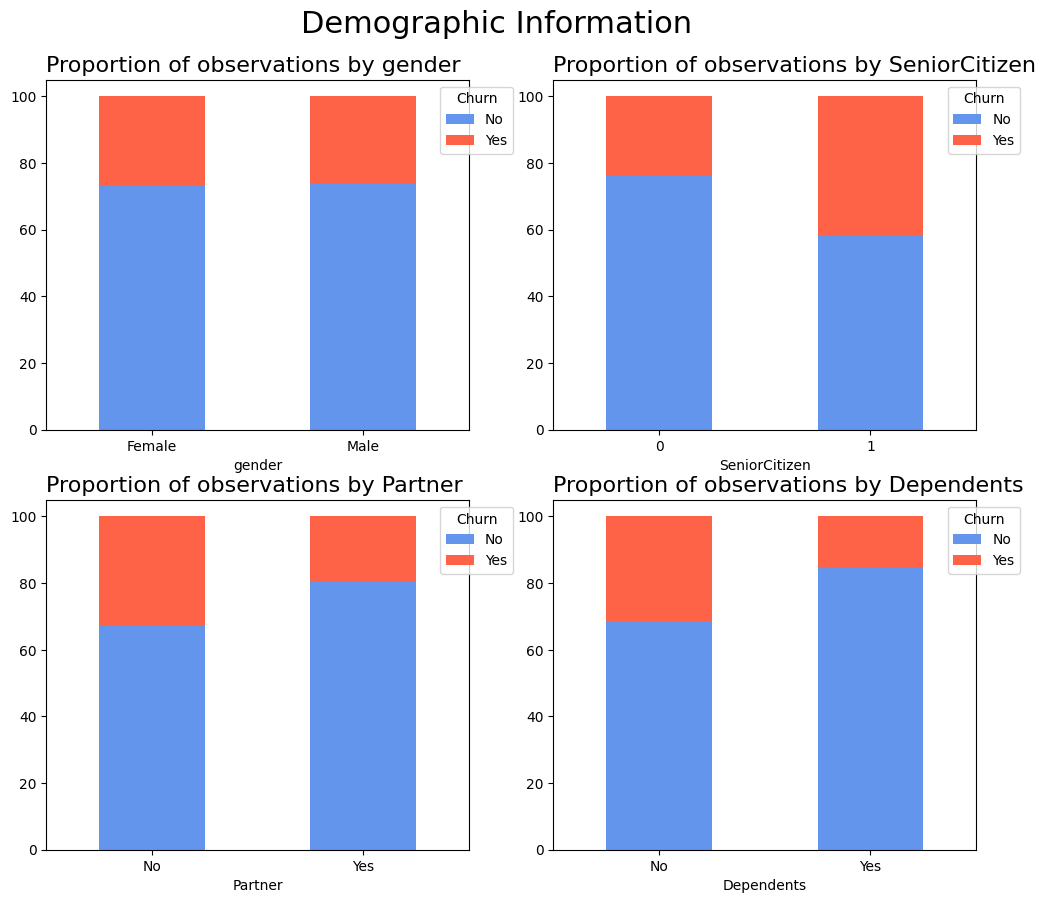

In [ ]:
percentage_stacked_plot(demographic_columns, 'Demographic Information')



*   Customers who have families show a lower churn rate than those who don’t, because customers without partners or dependents tend to have a higher churn rate.
*   There is no significant difference between genders, but senior citizens show a higher churn rate.



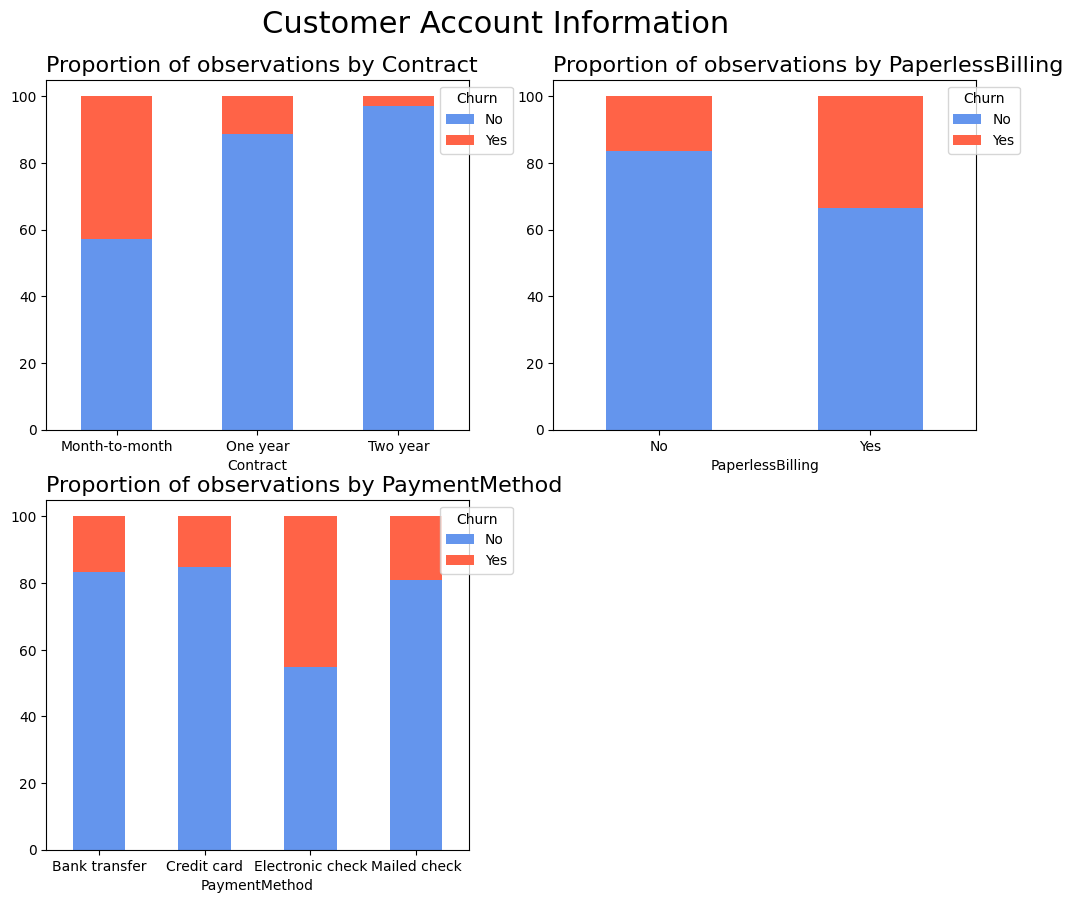

In [ ]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')



*   Customers who contracted long term (over a year) shows lower churn rate than those who contracted month to month
*   It is identified that customers are dissatisfied with paying by electronic check, as this group shows a significantly higher churn rate
*   Customers are also dissatisfied with the paperless billing system — about 30% of them tend to churn


In [ ]:
def histogram_plots(columns_to_plot, super_title):

    '''
    Prints a histogram for each independent variable of the list columns_to_plot.
           Parameters:
                   columns_to_plot (list of string): Names of the variables to plot
                   super_title (string): Super title of the visualization
           Returns:
                   None
   '''
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)


    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df_telco[df_telco['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True,
                                                       alpha=0.5, color='cornflowerblue', label='No')
        df_telco[df_telco['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='tomato', label='Yes')

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)


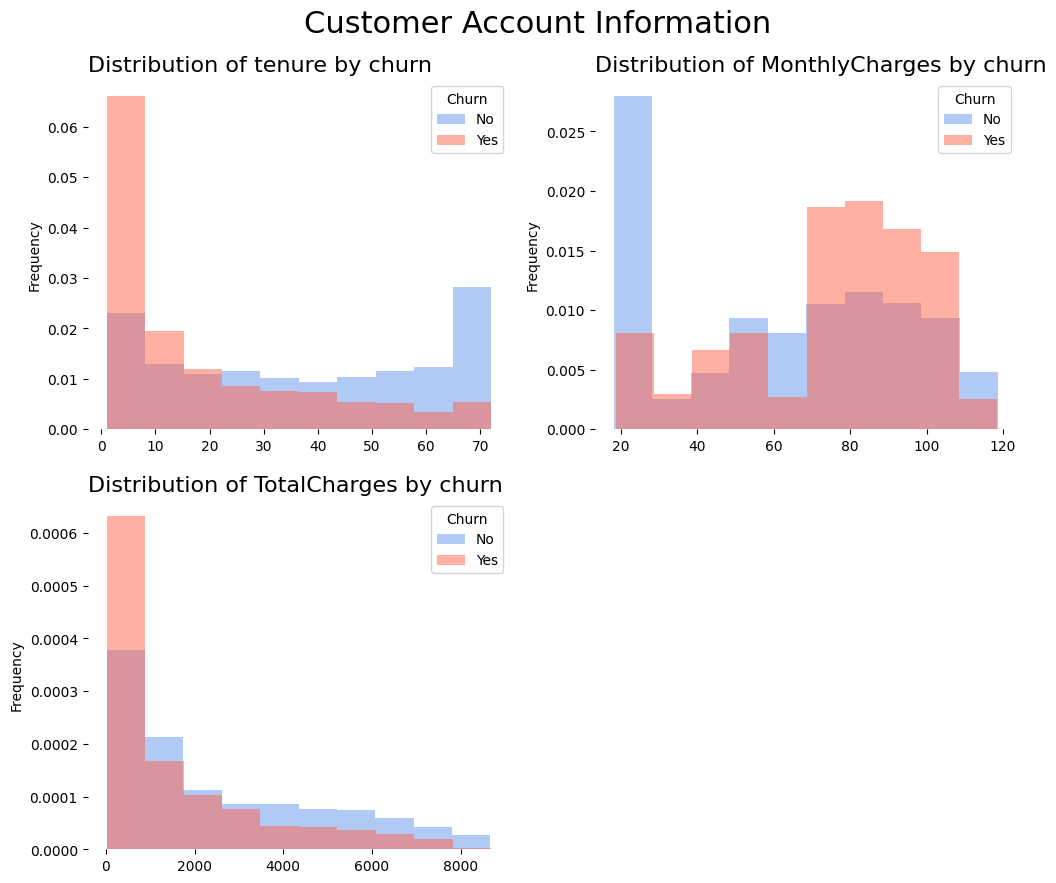

In [ ]:
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns
histogram_plots(account_columns_numeric, 'Customer Account Information')



* The churn rate tends to increase as monthly charges rise, but Clients with higher total charges are less likely to leave the company. Customers who contract month-to-month might are dissatisfied with monthly payments
* New customers with low tenure are more likely to churn.





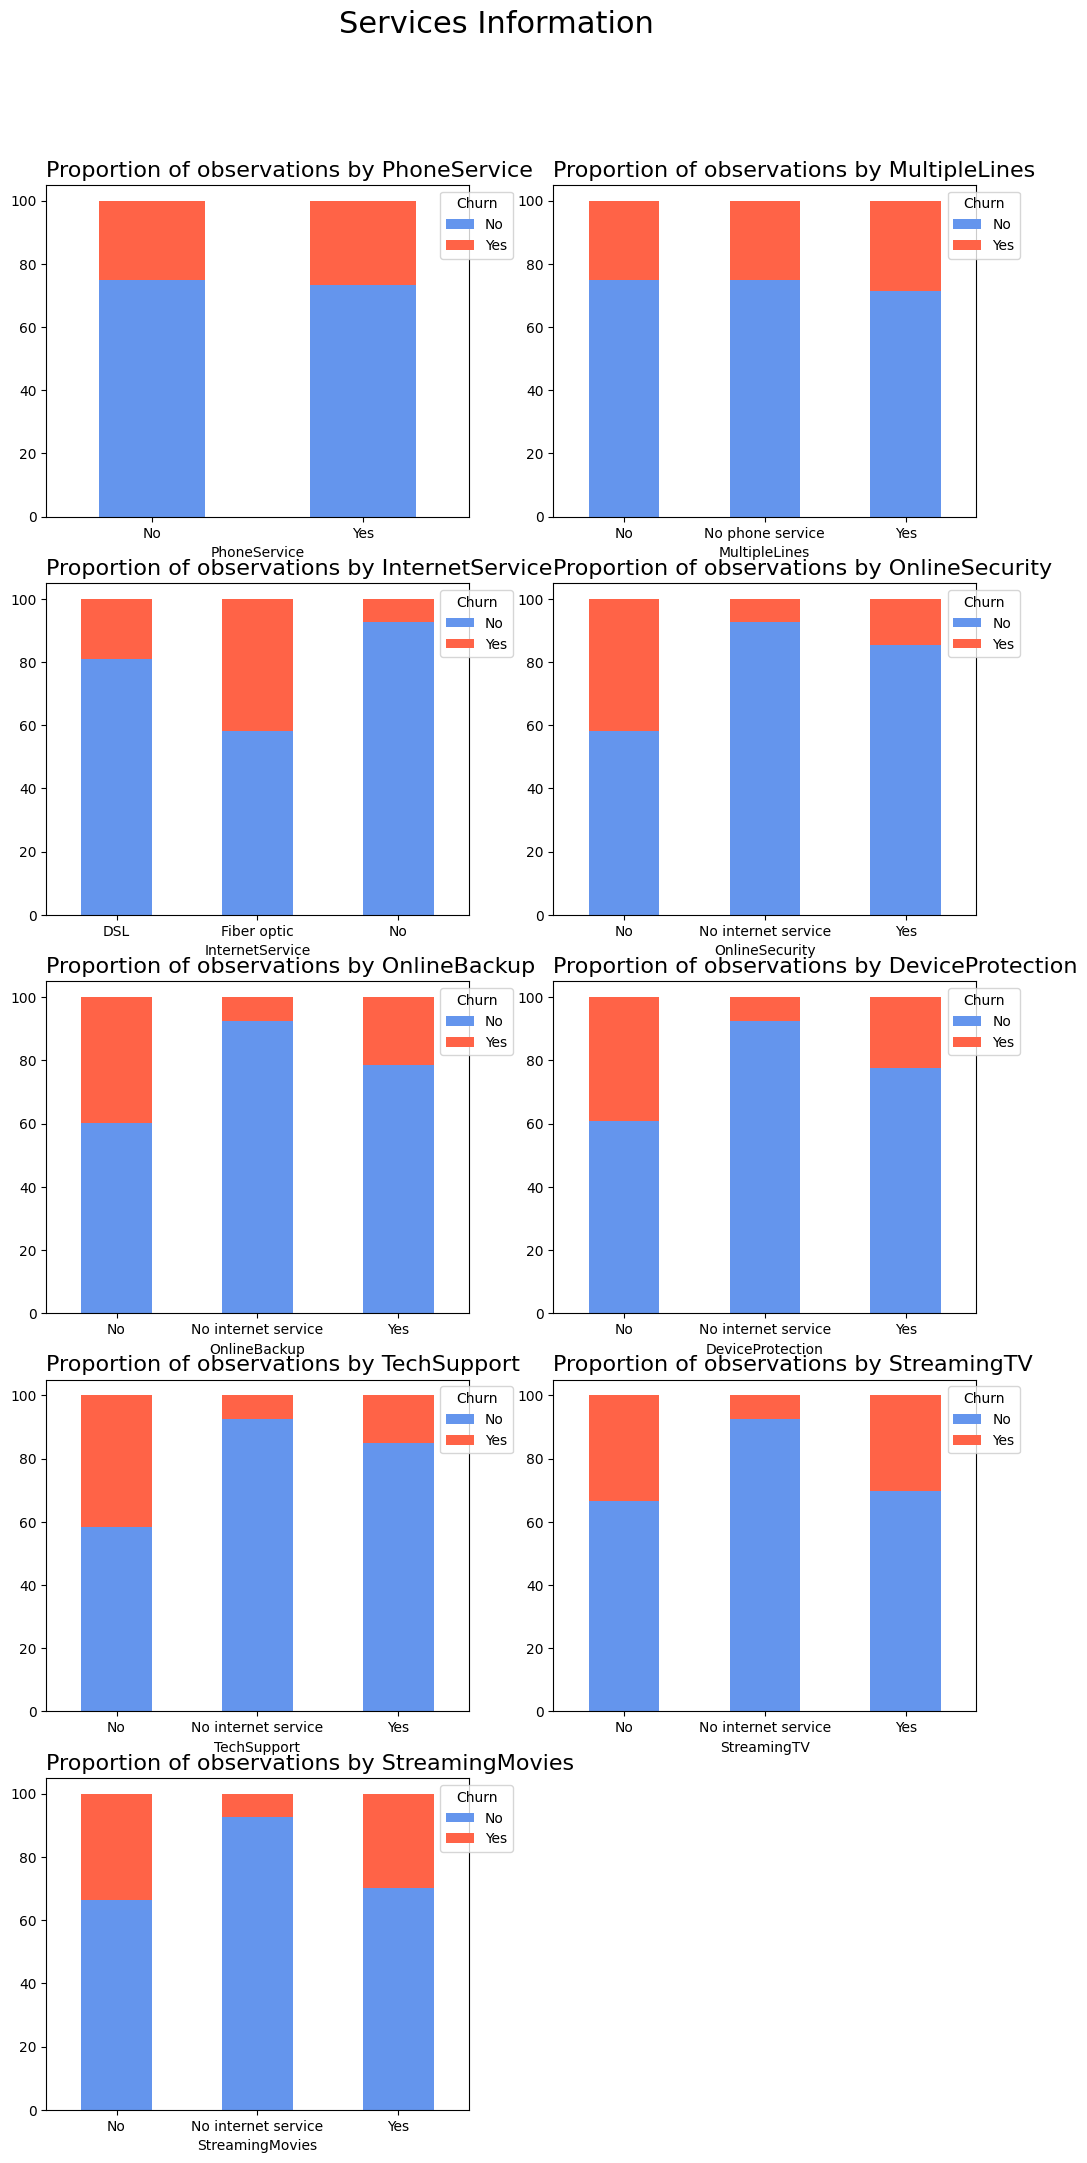

In [ ]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

There two main services: Phone and Internet service.

*   Multiplelines doesn't affact the churn rate in phone servie. the churn rate are almost same whether the customers have multiple line or not
*   However, the following factors are associated with a relatively higher churn rate in internet service:



1.   Fiber optic
2.   No online security
3.   No Online Backup
4.   No Device Protection
5.   No Tech Support

**As internet technology has improved, customers have come to expect secure and high-quality services**







4. Feature importance

Mutual information — analysis of linear and nonlinear relationships

Mutual information measures the mutual dependency between two variables based on entropy estimations. In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. ***Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target***.

The Scikit-Learn library has implemented mutual information in the metrics package. The following code computes the mutual information score between each categorical variable of the data set and the Churn variable.

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


/tmp/ipython-input-305933255.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Mutual Information', y='Feature', palette='viridis')


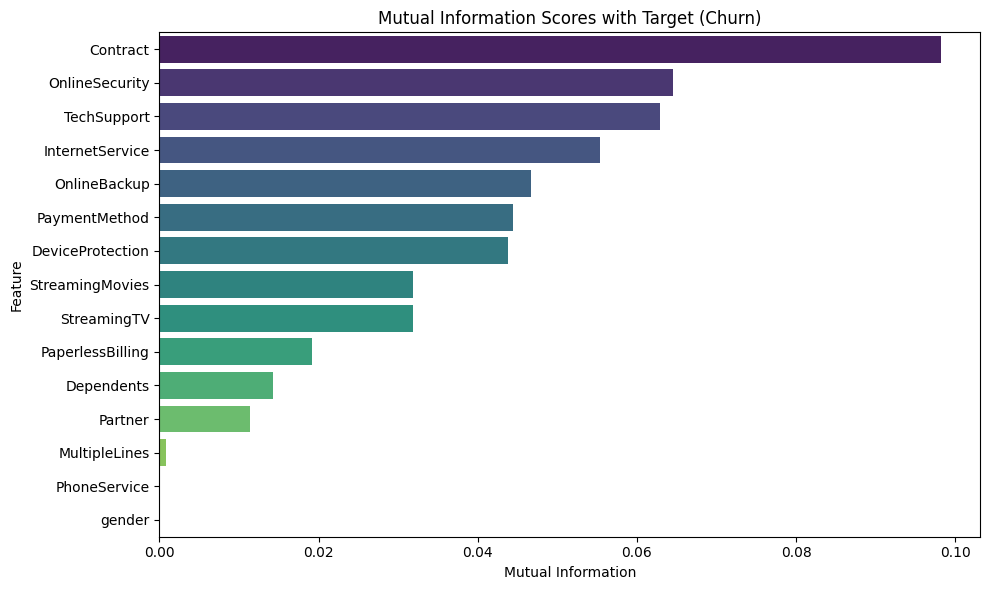

In [ ]:
from sklearn.metrics import mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

def compute_mutual_information(categorical_serie):
  return mutual_info_score(categorical_serie, df_telco.Churn)

categorical_variables = df_telco.select_dtypes(include=object).drop('Churn', axis=1)

feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)


# Visualize as a barplot or heatmap
plt.figure(figsize=(10,6))
# Convert the Series to a DataFrame before plotting
feature_importance_df = feature_importance.reset_index()
feature_importance_df.columns = ['Feature', 'Mutual Information']
sns.barplot(data=feature_importance_df, x='Mutual Information', y='Feature', palette='viridis')
plt.title('Mutual Information Scores with Target (Churn)')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target.this method is able to detect not only linear relationships but also nonlinear ones

Contract shows the highest mutual information score in the chart. It is the most useful depandant variable to predict churn rate.

## **Feature Engineering**

In [ ]:
df_telco_transformed = df_telco.copy()

label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

for column in label_encoding_columns:
  if column =='gender':
    df_telco_transformed[column] = df_telco_transformed[column].map({'Female':1, 'Male':0})
  else:
    df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No':0})

In [ ]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

df_telco_transformed = pd.get_dummies(df_telco_transformed, columns = one_hot_encoding_columns)

#this method should be avoided when the categorical column has a large number of unique values due to the significant increase in the dimensionality of the dataset

In [ ]:
# select independent variables
X = df_telco_transformed.drop(columns='Churn')

# select dependent variables
y = df_telco_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Normalize AFTER SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

## **Model Development**

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def create_models(seed=2):

  models = []
  models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy = 'most_frequent')))
  models.append(('K_nearest_neighbors', KNeighborsClassifier()))
  models.append(('Logistic_regression', LogisticRegression(random_state=seed)))
  models.append(('Support Vector Machine', SVC(random_state=seed)))
  models.append(('random_forest', RandomForestClassifier(random_state=seed)))
  models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

  return models

models = create_models()

In [ ]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:

  model.fit(X_train_scaled, y_train_res).predict(X_test_scaled)
  predictions = model.predict(X_test_scaled)

  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  f1 = f1_score(y_test, predictions)

  results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

results_df.round(3)









/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,dummy_classifier,0.745,0.000,0.000,0.000
1,K_nearest_neighbors,0.746,0.502,0.605,0.549
2,Logistic_regression,0.787,0.576,0.625,0.600
3,Support Vector Machine,0.782,0.571,0.580,0.576
4,random_forest,0.770,0.548,0.556,0.552
5,gradient_boosting,0.775,0.550,0.636,0.590


Logistic regression proved to be the best model for predicting customer churn among the six models tested.

There are several reasons supporting this conclusion:

It achieved the highest accuracy (0.787), meaning the model correctly predicted customer churn about 79% of the time overall.

It also recorded the highest precision (0.576) and recall (0.625). This means that 58% of the customers predicted as churners actually churned, and 63% of all actual churners were correctly identified by the model.

The F1 score of 0.6, the highest among all models, indicates a good balance between precision and recall.










In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


xgb_model = xgb.XGBClassifier()


grid_parameters = {'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]}

grid_search = GridSearchCV(estimator= xgb_model,
                                   param_grid= grid_parameters,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

grid_search.fit(X_train_scaled,y_train_res)

print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1310
           1       0.55      0.59      0.57       448

    accuracy                           0.77      1758
   macro avg       0.70      0.71      0.71      1758
weighted avg       0.78      0.77      0.78      1758



In [45]:
results_df

XGB_result = {
    'XGBoost': {'Accuracy': accuracy_score(y_test, y

,Model,Accuracy,Precision,Recall,F1 Score
0,dummy_classifier,0.745165,0.000000,0.000000,0.000000
1,K_nearest_neighbors,0.746303,0.501852,0.604911,0.548583
2,Logistic_regression,0.787258,0.576132,0.625000,0.599572
3,Support Vector Machine,0.782139,0.571429,0.580357,0.575858
4,random_forest,0.770193,0.548458,0.555804,0.552106
5,gradient_boosting,0.774744,0.550193,0.636161,0.590062


In [48]:
XGB_result =  {
        'Model': ['XGBoost'],
        'Accuracy': [accuracy_score(y_test, y_pred_xgb)],
        'Precision': [precision_score(y_test, y_pred_xgb)],
        'Recall': [recall_score(y_test, y_pred_xgb)],
        'F1 Score': [f1_score(y_test, y_pred_xgb)]
    }

XGB_result_pd = pd.DataFrame(XGB_result)

result_final = pd.concat([results_df, XGB_result_pd], ignore_index=True)

result_final.round(3)

,Model,Accuracy,Precision,Recall,F1 Score
0,dummy_classifier,0.745,0.000,0.000,0.000
1,K_nearest_neighbors,0.746,0.502,0.605,0.549
2,Logistic_regression,0.787,0.576,0.625,0.600
3,Support Vector Machine,0.782,0.571,0.580,0.576
4,random_forest,0.770,0.548,0.556,0.552
5,gradient_boosting,0.775,0.550,0.636,0.590
6,XGBoost,0.772,0.550,0.594,0.571


## **Conclusion**

In conclusion, seven models were developed to predict the churn rate, and the **Logistic Regression model achieved the best performance across all four metrics — accuracy, precision, recall, and F1 score.**
Although the XGBoost model was fine-tuned through hyperparameter optimization, Logistic Regression still outperformed it.
Since the dataset was imbalanced, synthetic samples were generated using SMOTE, which helped improve Logistic Regression’s performance over XGBoost.
As a result, the Logistic Regression model predicts churn with nearly 80% accuracy, demonstrating a moderate trade-off between precision and recall.


